## Haar like Feature

![img](https://t1.daumcdn.net/cfile/tistory/2631DA41581154882A)


- Haar Cascade라고 불리는 Haar like feature는 사람 얼굴에서 특징을 추출하는 방법이다.
- 사람 얼굴의 생김새가 다양하더라도 명암의 차이는 거의 없을것이라는 아이디어를 기반으로 만들어졌다.
- 얼굴에 있는 각 부위의 명암 특성을 이용해 특징을 추출하는데, 명암 필터의 모양과 적용 방법이 컨볼루션 커널과 흡사하다.

In [17]:
import cv2
import matplotlib.pyplot as plt

In [18]:
face_cascade = cv2.CascadeClassifier('./haar_xml/haarcascade_frontface.xml')
eye_cascade = cv2.CascadeClassifier('./haar_xml/haarcascade_eye.xml')

In [19]:
img = cv2.imread('img/template_match_and_Haar-like Feature/haar_sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

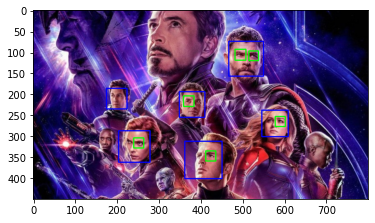

In [20]:
# 얼굴 특징 검출
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    # 얼굴 위치 표시
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 눈 위치 검출을 위해 변환
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # 눈 특징 검출
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # 눈 위치 표시
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)